In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data_train = pd.read_csv("data/train.csv")
df_train = data_train.copy()
data_train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [3]:
data_train.shape

(1460, 81)

In [4]:
nan_cols = df_train.isnull().sum().index[df_train.isnull().sum()>0.15*len(df_train)].to_list()
nan_cols

['LotFrontage',
 'Alley',
 'MasVnrType',
 'FireplaceQu',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [5]:
df_train = df_train.drop(nan_cols, axis=1)

In [6]:
df_train = df_train.drop('Id', axis=1)

In [7]:
df_train.select_dtypes('object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [8]:
df_train.select_dtypes('int').columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [9]:
df_train.select_dtypes('float').columns

Index(['MasVnrArea', 'GarageYrBlt'], dtype='object')

In [10]:
df_train.isnull().sum()[df_train.isnull().sum()>0.0*len(df_train)]

MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [11]:
df_train[df_train['GarageType'].isnull()][['GarageType', 'GarageYrBlt', 'GarageFinish','GarageQual', 'GarageCond' ]]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
39,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1349,NaN,NaN,NaN,NaN,NaN
1407,NaN,NaN,NaN,NaN,NaN
1449,NaN,NaN,NaN,NaN,NaN
1450,NaN,NaN,NaN,NaN,NaN


In [12]:
df_train[[ 'GarageCond' ]].value_counts()

GarageCond
TA            1326
Fa              35
Gd               9
Po               7
Ex               2
Name: count, dtype: int64

In [13]:
def imputer(df):
    for column in df.columns:
        if 'Garage' in column:
            df[column]=df[column].fillna('NO_Garage')
        if 'Bsmt' in column:
            df[column]=df[column].fillna('NO_Basement')
    return df


In [14]:
df_train = imputer(df_train)


In [15]:
df_train.isnull().sum()[df_train.isnull().sum()>0.0*len(df_train)]

MasVnrArea    8
Electrical    1
dtype: int64

In [16]:
# drop rows that have NaN values
df_train = df_train.drop_duplicates()
df_train = df_train.dropna(axis=0)

In [17]:
df_train.shape

(1451, 73)

In [18]:
df_train.isnull().sum().sum()

0

In [32]:
from sklearn.preprocessing import LabelEncoder

In [41]:
df_train[cat_col].isnull().sum().sum()

0

In [42]:
cat_col

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [54]:
cat_col = df_train.select_dtypes(include = "object").columns

for feat in cat_col:
    df_train[feat] = le.fit_transform(df_train[feat].astype(str))


## ML model 

In [78]:
from sklearn.model_selection import train_test_split, GridSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor

In [55]:
X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']

<Axes: >

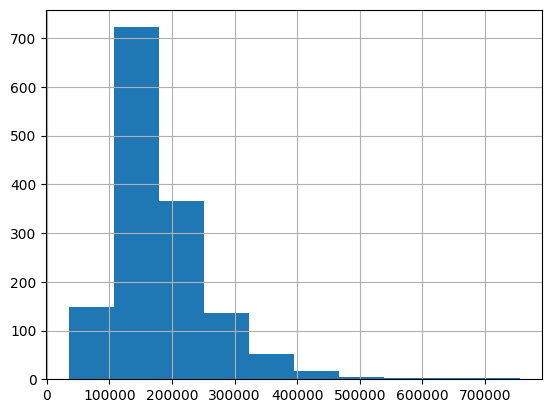

In [77]:
y.hist()

In [56]:
X_train, X_test, y_train,  y_test = train_test_split(X, y, shuffle = True ,random_state = 42)

In [57]:
y_train.shape

(1088,)

In [123]:
models= {"AdaBoost":AdaBoostRegressor(), 
"RandomForest":RandomForestRegressor(),
"GradientBoost":GradientBoostingRegressor(),
"CatBoost":CatBoostRegressor(),"XGBoost": XGBRegressor()
}#"CatBoost":CatBoostRegressor(),"XGBoost": XGBRegressor()

In [80]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = model.score(X_test, y_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'> {name} : R2 score = {r2:.2f} , RMSE = {rmse:.2f}, MAE = {mae:.2f}')


> AdaBoost : R2 score = 0.83 , RMSE = 29204.51, MAE = 21842.62
> RandomForest : R2 score = 0.91 , RMSE = 21808.29, MAE = 15263.63
> GradientBoost : R2 score = 0.92 , RMSE = 20791.70, MAE = 14756.64
> CatBoost : R2 score = 0.93 , RMSE = 18359.24, MAE = 12997.13
> XGBoost : R2 score = 0.90 , RMSE = 23072.42, MAE = 16247.63


## Optimisation : Hyperparameters

In [128]:
param_grid = {'AdaBoost__n_estimators':[30,50,100],'AdaBoost__learning_rate':[0.5,1, 1.2],'AdaBoost__loss':['linear', 'square'],
'RandomForest__n_estimators':[100, 150],'RandomForest__max_features':["sqrt", "log2"],
 "GradientBoost__n_estimators":[100,150],"GradientBoost__learning_rate":[0.5,1, 1.2],"GradientBoost__max_features":["sqrt", "log2"],#},
  "CatBoost__num_trees":[1000, 2000],"CatBoost__learning_rate":[0.5,1, 1.2],"CatBoost__verbose":[False],
 "XGBoost__n_estimators":[1000,2000 ],"XGBoost__max_depth":[2,3,5],"XGBoost__eta":[0.3, 0.1, 0.01]  } 

param_grid = {"num_trees":[1000, 2000],"learning_rate":[0.5,1, 1.2],"verbose":[False]}

In [129]:
grid = GridSearchCV(models['CatBoost'], param_grid=param_grid, scoring='r2', n_jobs=-1, cv=3)
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x00000112199E0050>,
             n_jobs=-1,
             param_grid={'learning_rate': [0.5, 1, 1.2],
                         'num_trees': [1000, 2000], 'verbose': [False]},
             scoring='r2')

In [130]:
print(grid.best_params_)
print(grid.best_score_)

{'learning_rate': 0.5, 'num_trees': 2000, 'verbose': False}
0.8376683495827447


In [131]:
y_pred = grid.predict(X_test)
r2 = grid.score(X_test, y_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print(f'> {name} : R2 score = {r2:.2f} , RMSE = {rmse:.2f}, MAE = {mae:.2f}')


> XGBoost : R2 score = 0.89 , RMSE = 23570.05, MAE = 16971.69
